# Project One

In [1]:
# Import library
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf

import scipy as sp


plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')

/home/pleyva/miniconda3/envs/ML/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2025-09-20 13:39:30.328706: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-20 13:39:30.337573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758389970.347585 1166435 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758389970.350211 1166435 cuda_blas.cc

In [2]:
# Import dataset
path = './data/'
df = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (1338, 7)



### Data Visualization

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


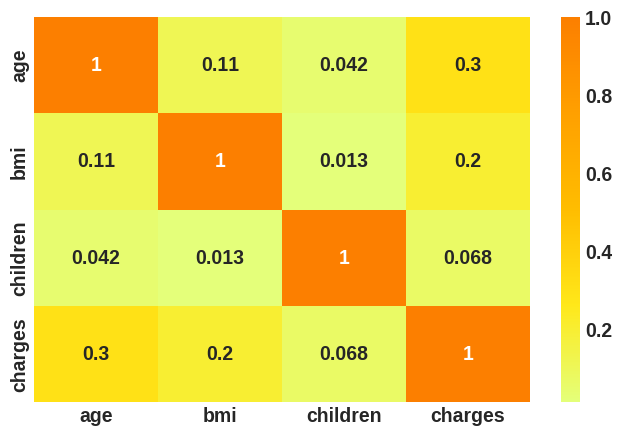

In [6]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Notes

There is no clear linear correlation between any features in the dataset. Thus we cannot express one feature as a linear combination of another. 

/tmp/ipykernel_1166435/3157276943.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
/tmp/ipykernel_1166435/3157276943.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)


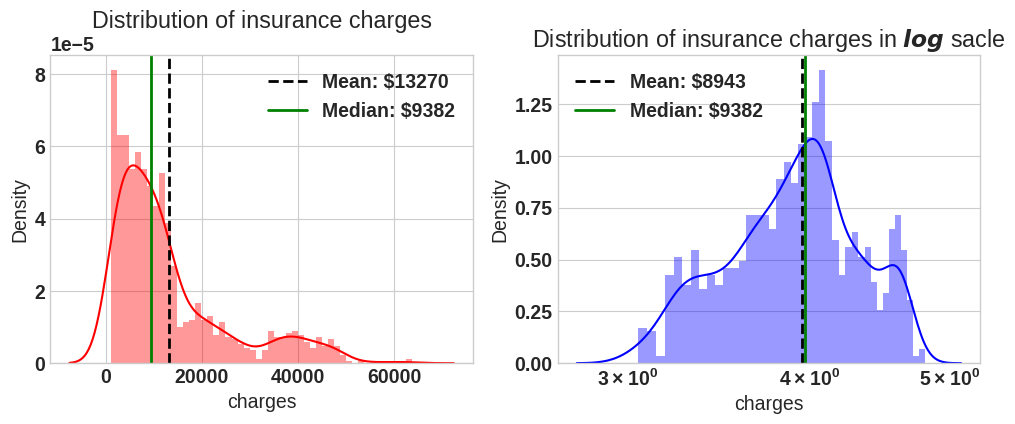

In [7]:
# Distribution of insurance charges
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')
# Add mean and median lines
mean_charges = df['charges'].mean()
median_charges = df['charges'].median()
ax.axvline(mean_charges, color='black', linestyle='--', linewidth=2, label=f'Mean: ${mean_charges:.0f}')
ax.axvline(median_charges, color='green', linestyle='-', linewidth=2, label=f'Median: ${median_charges:.0f}')
ax.legend()

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
# Add mean and median lines for log scale
mean_log_charges = np.log10(df['charges']).mean()
median_log_charges = np.log10(df['charges']).median()
ax.axvline(mean_log_charges, color='black', linestyle='--', linewidth=2, label=f'Mean: ${10**mean_log_charges:.0f}')
ax.axvline(median_log_charges, color='green', linestyle='-', linewidth=2, label=f'Median: ${10**median_log_charges:.0f}')
ax.legend()

plt.savefig('charges_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## Notes

Data appears to be normally distributed but rightly skewed. Can note the normal distribution because of log graph.

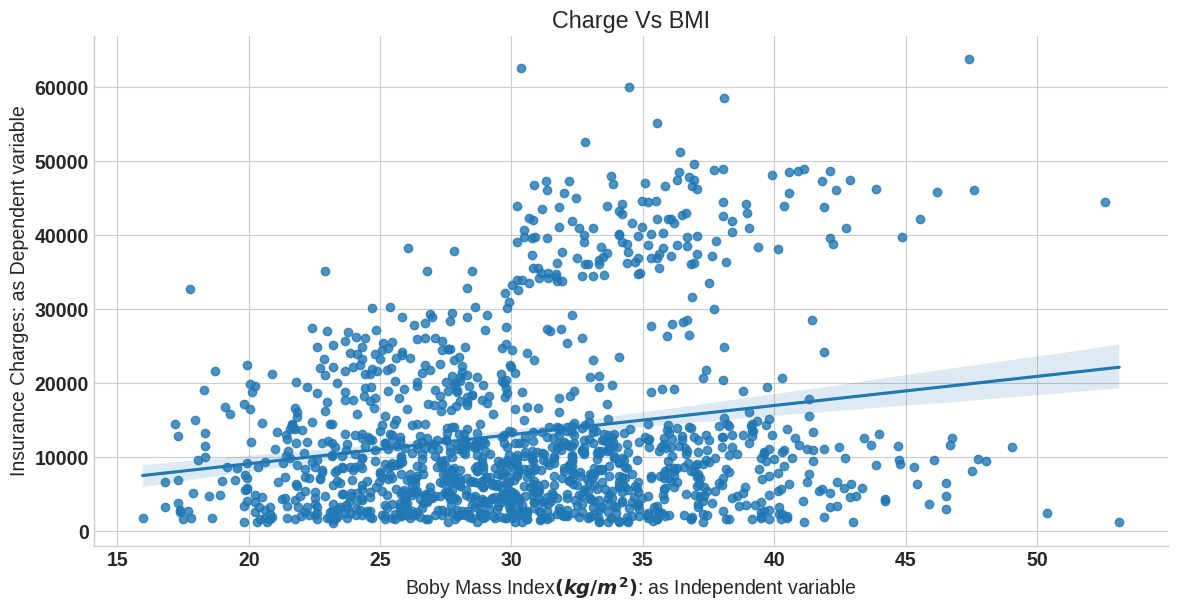

In [8]:
# Plotting charges by BMI
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)

plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')
plt.savefig('charges_vs_bmi.png', dpi=300, bbox_inches='tight')
plt.show()

## Notes

Very noisy data but there appears to be small positive relationship between BMI and Charges

/tmp/ipykernel_1166435/3366825968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
/tmp/ipykernel_1166435/3366825968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)


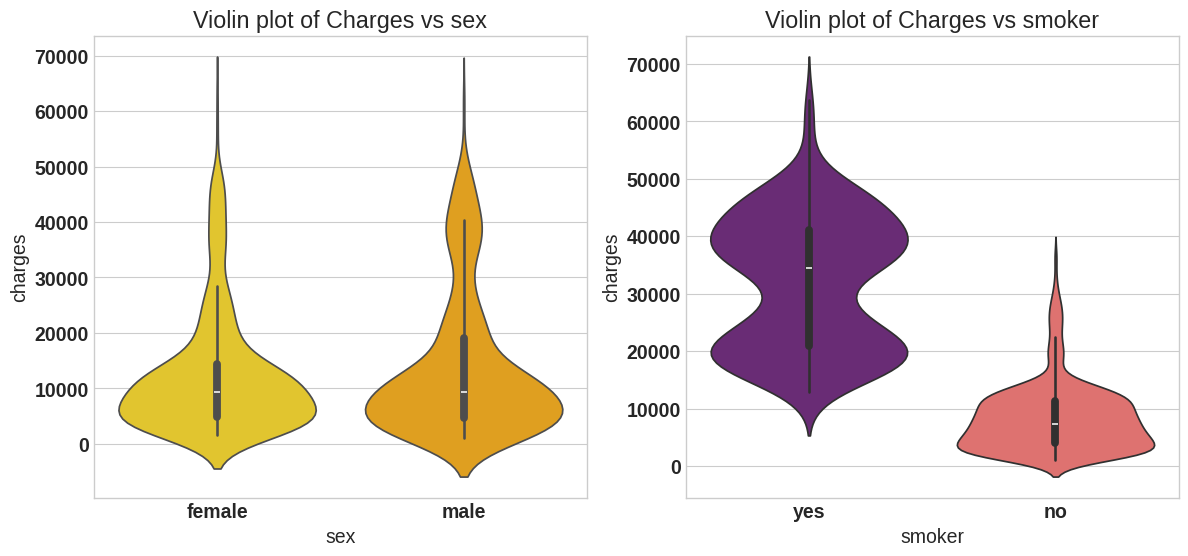

In [9]:
f = plt.figure(figsize = (14,6))

ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

plt.savefig('violin_plots_sex_smoker.png', dpi=300, bbox_inches='tight')
plt.show()

## Notes

#### Male & Female 
The spread of their distributions and width of their distributions seems very similar. They also roughly centered around the same value. 
This may imply that gender does not have a high impact on the charges, 

#### Smoker
The none smoker has a lowered center violin and a smaller width. The smoker not only has a wider violin but is center at much higher cost.
This may imply that smoking has high impact on the charges


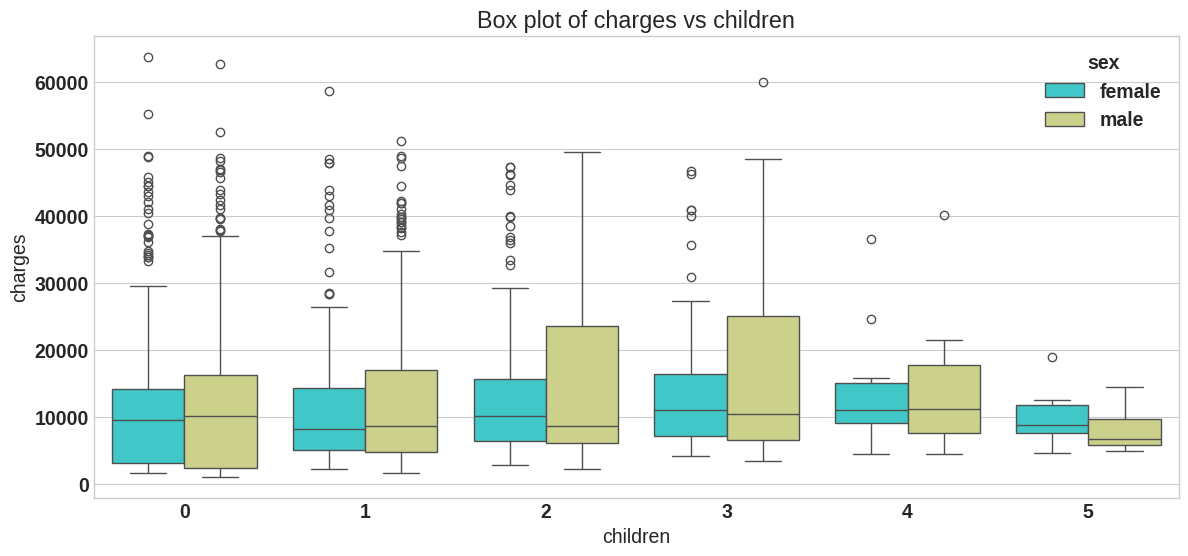

In [10]:
plt.figure(figsize = (14, 6))

sns.boxplot(x = 'children', y = 'charges', hue = 'sex', palette = 'rainbow', data = df)
plt.title('Box plot of charges vs children')
plt.savefig('boxplot_charges_vs_children.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_1166435/292164769.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(child_data, bins=20, ax=axes[i], color=f'C{i}')
/tmp/ipykernel_1166435/292164769.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(child_data, bins=20, ax=axes[i], color=f'C{i}')
/tmp/ipykernel_1166435/2921647

<Figure size 1200x600 with 0 Axes>

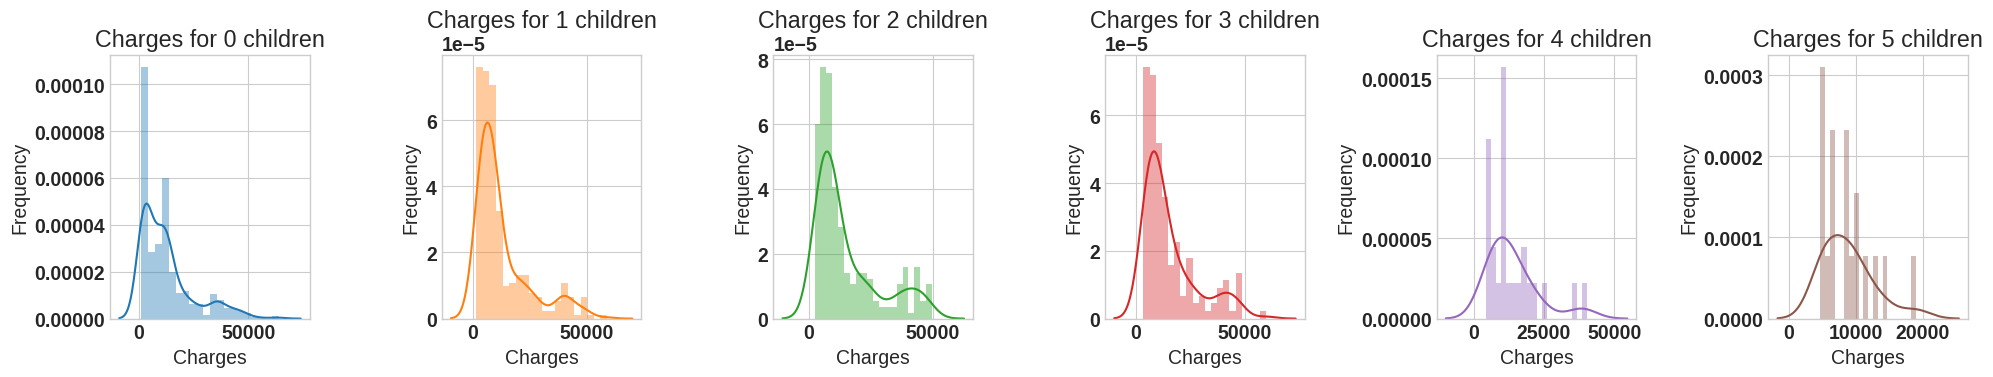

In [11]:
plt.figure(figsize = (12, 6))
# Create 5 subplots for charges based on number of children (0-4)
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

for i in range(6):
    child_data = df[df['children'] == i]['charges']
    sns.distplot(child_data, bins=20, ax=axes[i], color=f'C{i}')
    axes[i].set_title(f'Charges for {i} children')
    axes[i].set_xlabel('Charges')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('charges_distribution_by_children.png', dpi=300, bbox_inches='tight')
plt.show()


In [12]:
df.groupby('children').agg(['mean','min','max'])['charges']

/tmp/ipykernel_1166435/2881019953.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


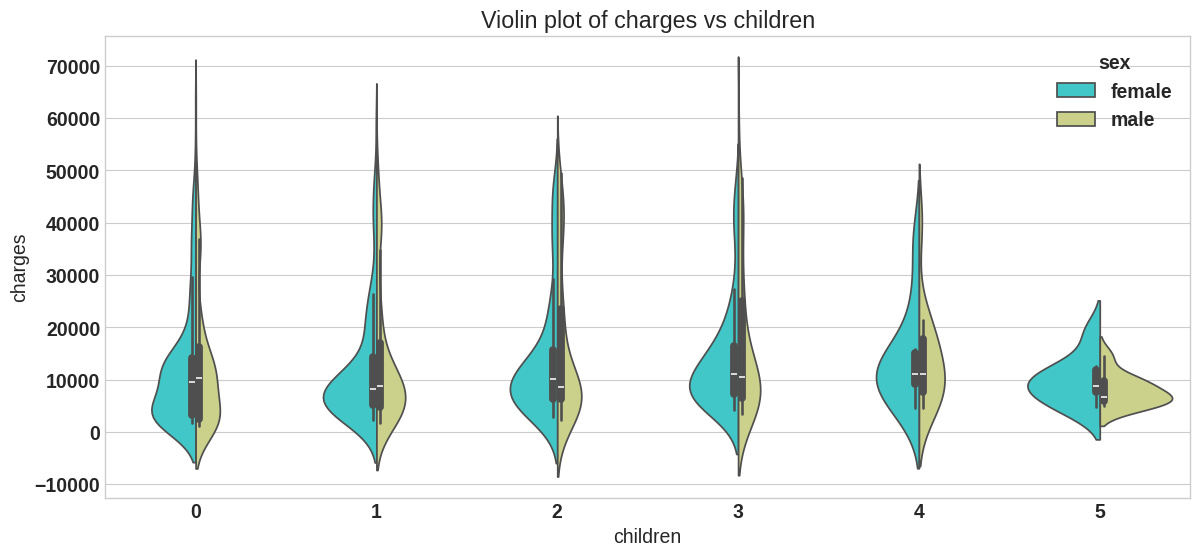

In [13]:
plt.figure(figsize=(14,6))
sns.violinplot(x='children', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children')
plt.savefig('violin_plot_charges_vs_children_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()

## Notes

The median charge is mostly centered around the same value. The spread of charges for the families that have 1, 2 or 3 children is much higher than that of 0, 4 and 5. However, that might just be because of the distribution of the nubmer of children that a family. 

As we can see in the violin plots the distributions of the children is very similar. The only one that is smaller is the 5 children plot but as mentioned that might just be because there are not that many families with 5 children. 

This may conclude that children is not a high impact feature on the charges.



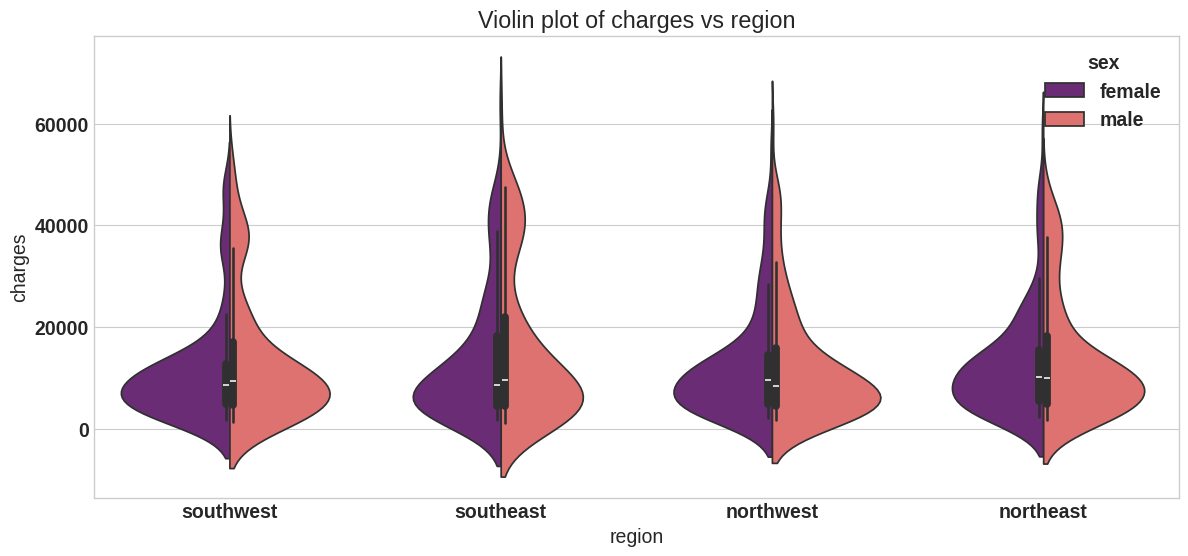

In [14]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='magma',split=True)
plt.title('Violin plot of charges vs region')
plt.savefig('violin_plot_charges_vs_region_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()


## Notes

The violin plots of each region appear to be extremely similar both in width and stretch. They also appeared to be centerd near the same value.

This may conclude that just like the sex the region does not have a high impact on the charges.

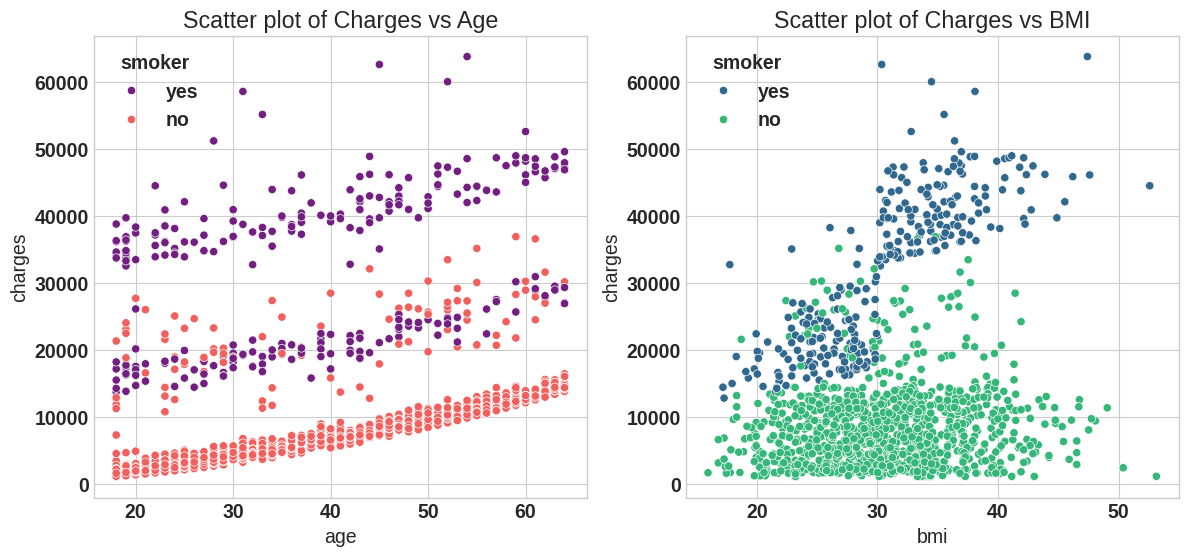

In [15]:
f = plt.figure(figsize = (14,6))

ax = f.add_subplot(121)

sns.scatterplot(x='age',y='charges',data=df,hue='smoker',palette='magma',ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)

sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker',palette='viridis',ax=ax)
ax.set_title('Scatter plot of Charges vs BMI')

plt.savefig('scatter_plots_charges_vs_age_bmi.png', dpi=300, bbox_inches='tight')
plt.show()


## Notes


### Age, Smoke, Charges
There appears to be three levels to this graph. 1st level: non smokers, healthy people. Average person probably may get this charge. 2nd level: smokers, unhealthy people. Average unhealthy person, smoker may get this charge. 3rd level: smokers. High Smokers get this charge.

This graph demostrates that their maybe hidden layers to the data that we are not capturing. For example, the level of activity in the person (inactivate people that don't smoke may be in the second level). Another thing that may not be highlighted in the data is the severity of their smoking (active smokers may be the 3rd level and non-active smokers maybe in the 2nd level). This could create a correlation between the nonsmokers and smokers in the second level. 


### Charges vs BMI 

This plot explains the potentially 3rd level of charges we saw. When you start at the lower BMIs ( 20 - 30 ) there appears to be a noticeable but not strong disparity in the charges being applied to people who smoke and those who don't. However, when you approach the higher end 30 + BMI the disparity grows signicantly and their is a large gap between the non smokers and higher smokers. This implies that the 3rd level we saw in the previous graph could be the high BMI + smokers group.

This could imply that these are the highest at risk for health issue thus raising charges.

# Data Preprocessing

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
smoke = df['smoker'].copy()
smoke.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [18]:
smoke.astype(str)

smoke_encoded = pd.get_dummies(smoke, prefix = 'smoker', drop_first = True)
smoke_encoded.head()

,smoker_yes
0,1
1,0
2,0
3,0
4,0


In [19]:
smoke_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   smoker_yes  1338 non-null   uint8
dtypes: uint8(1)
memory usage: 1.4 KB


In [20]:

df['smoker'] = smoke_encoded
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [21]:
sex = df['sex'].copy()
sex.head()
sex.astype(str)

sex_encoded = pd.get_dummies(sex, prefix = 'sex', drop_first = True)
sex_encoded.head()

,sex_male
0,0
1,1
2,1
3,1
4,1


In [22]:
df['sex'] = sex_encoded
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
region = df['region'].copy()
region.astype(str)
region.head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

In [24]:
region_encoded = region.map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})
region_encoded.head()

0    1
1    0
2    0
3    3
4    3
Name: region, dtype: int64

In [25]:
region_encoded.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: region
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [26]:
df['region'] = region_encoded
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   uint8  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   uint8  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), uint8(2)
memory usage: 55.0 KB


In [28]:
# Optimizing the data types 
df['age'] = df['age'].astype(np.uint8)
df['bmi'] = df['bmi'].astype(np.float32)
df['children'] = df['children'].astype(np.uint8)
df['region'] = df['region'].astype(np.uint8)
df['charges'] = df['charges'].astype(np.float32)
df.dtypes


age           uint8
sex           uint8
bmi         float32
children      uint8
smoker        uint8
region        uint8
charges     float32
dtype: object

In [29]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Feature Engineering

In [30]:
X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((936, 6), (402, 6), (936,), (402,))

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 33806944.0
R2: 0.7694315108083206


In [32]:
W = model.coef_
b = model.intercept_

print(f"W: {W}")
print(f"b: {b}")

W: [  261.17377   106.59479   344.77353   425.61148 23644.44      234.5755 ]
b: -13189.3740234375


/tmp/ipykernel_1166435/719662497.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred),ax=ax,color='b')


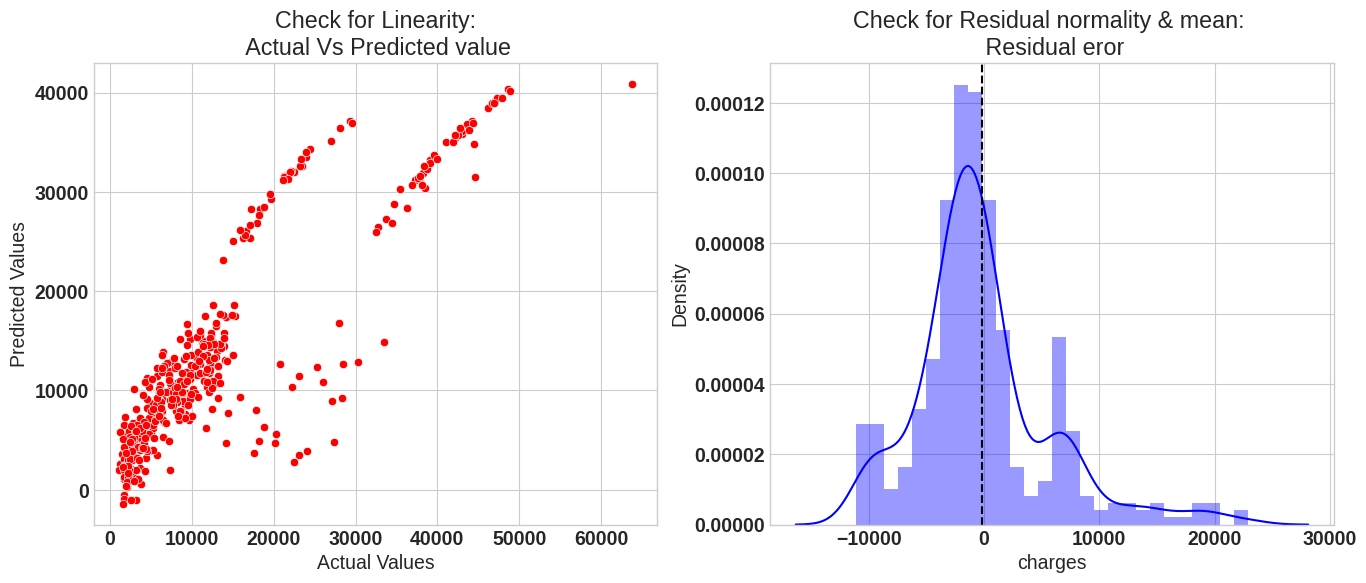

In [33]:
# Check for Linearity
f = plt.figure(figsize=(16,6))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

plt.savefig('linearity_check_plots.png', dpi=300, bbox_inches='tight')
plt.show()


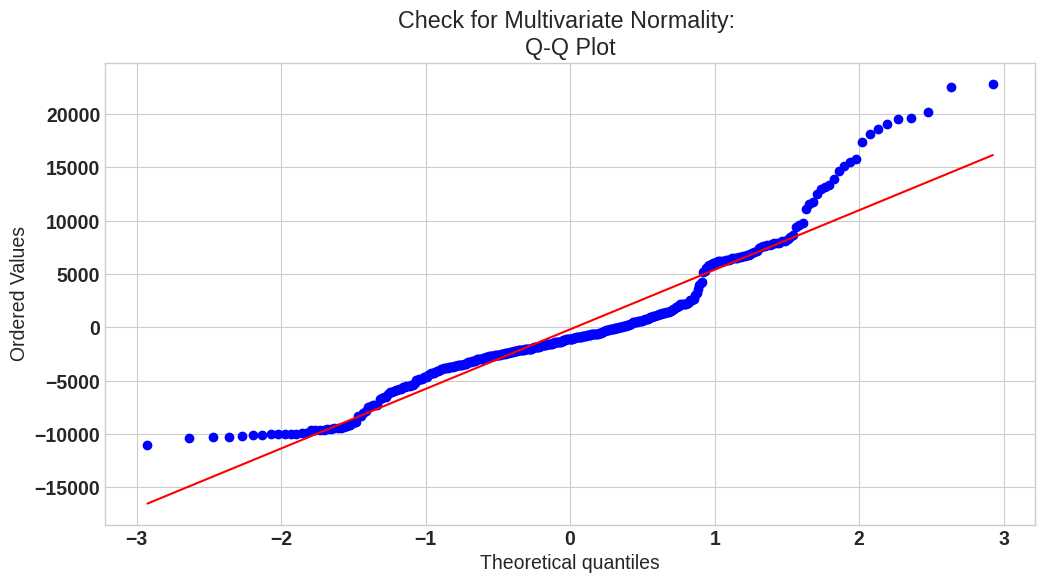

In [34]:
f,ax = plt.subplots(figsize=(12,6))
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot')

plt.savefig('qq_plot_check.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
VIF = 1/(1- r2)
VIF

4.337106095918711

[  261.17377   106.59479   344.77353   425.61148 23644.44      234.5755 ]


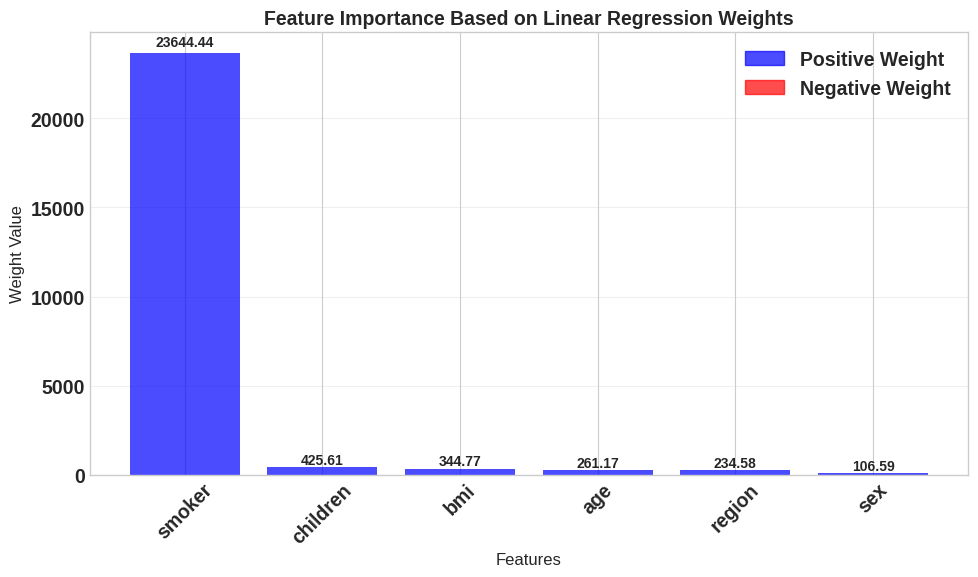

Feature Importance Summary:
----------------------------------------
smoker     : 23644.44 (|23644.44|)
children   :   425.61 (|425.61|)
bmi        :   344.77 (|344.77|)
age        :   261.17 (|261.17|)
region     :   234.58 (|234.58|)
sex        :   106.59 (|106.59|)


In [36]:
# Feature importance based on weights
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
weights = W.flatten()  # Flatten in case W is 2D

print(weights)

# Create a DataFrame for easy plotting
feature_importance = pd.DataFrame({
    'Feature': features,
    'Weight': weights,
    'Absolute_Weight': np.abs(weights)
})

# Sort by absolute weight for better visualization
feature_importance = feature_importance.sort_values('Absolute_Weight', ascending=False)

# Create the barplot
plt.figure(figsize=(10, 6))
colors = ['red' if w < 0 else 'blue' for w in feature_importance['Weight']]
bars = plt.bar(feature_importance['Feature'], feature_importance['Weight'], color=colors, alpha=0.7)

plt.title('Feature Importance Based on Linear Regression Weights', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, weight in zip(bars, feature_importance['Weight']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 * height if height > 0 else -0.05 * abs(height)),
             f'{weight:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# Add legend
red_patch = plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Negative Weight')
blue_patch = plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Positive Weight')
plt.legend(handles=[blue_patch, red_patch])

plt.tight_layout()
plt.savefig('feature_importance_weights.png', dpi=300, bbox_inches='tight')
plt.show()

# Print feature importance summary
print("Feature Importance Summary:")
print("-" * 40)
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']:10} : {row['Weight']:8.2f} (|{row['Absolute_Weight']:6.2f}|)")


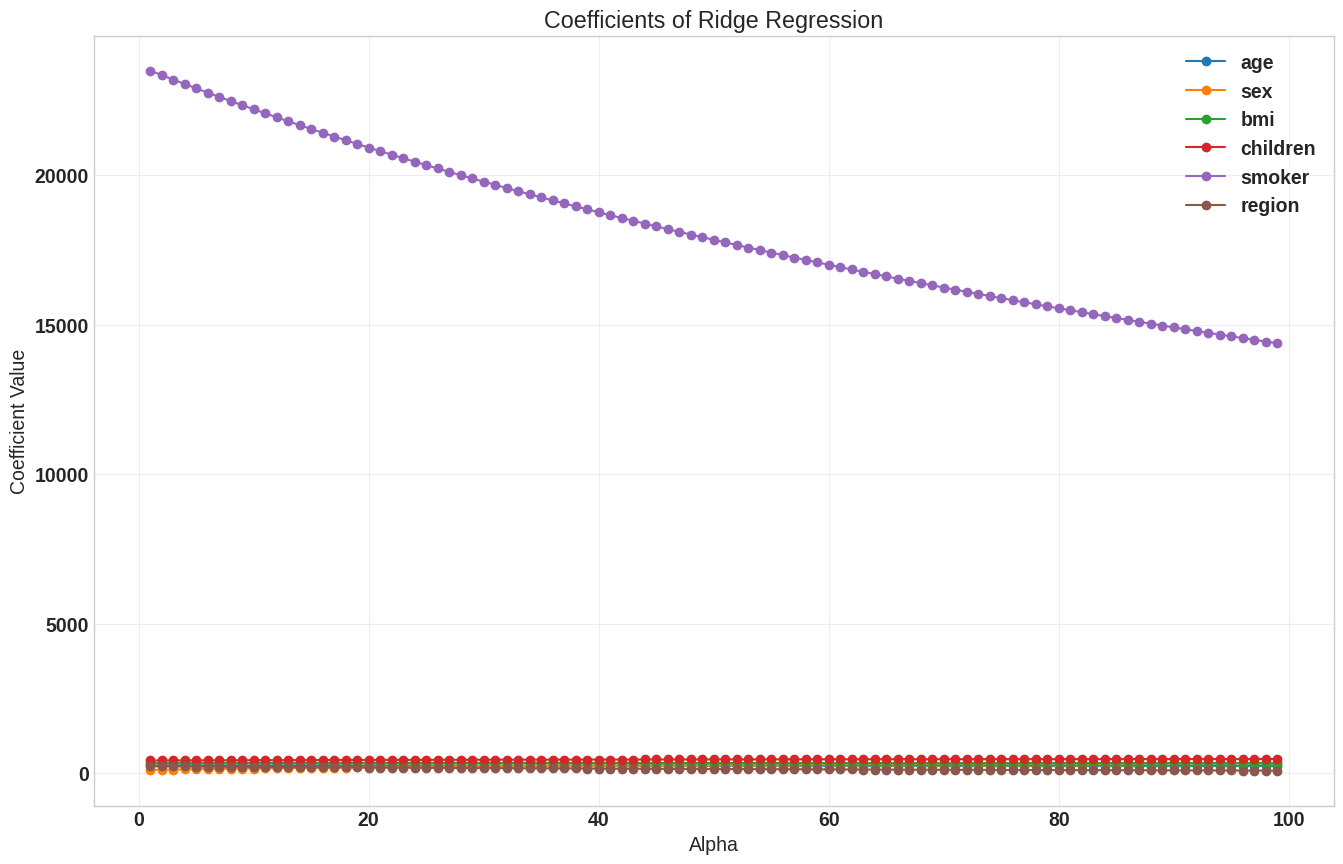

[  248.9886    333.55408   337.3562    475.3424  14374.394      87.93684]
-10507.565


In [37]:

coefficients = []
intercepts = []

for i in range(1, 100):
    ridge = Ridge(alpha=i)  # alpha is the regularization strength
    ridge.fit(X_train, y_train)
    coefficients.append(ridge.coef_)
    intercepts.append(ridge.intercept_)

plt.figure(figsize=(16, 10))

# Convert coefficients to numpy array for easier handling
coefficients_array = np.array(coefficients)

# Feature names based on the context
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Plot each coefficient with labels
for i in range(coefficients_array.shape[1]):
    plt.plot(range(1, 100), coefficients_array[:, i], label=feature_names[i], marker='o')

plt.title('Coefficients of Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('ridge_regression_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

print(coefficients_array[-1])
print(intercepts[-1])

